## Citations

Rollings, A. (2020). mlrose: Machine Learning, Randomized Optimization and SEarch package for Python, hiive extended remix. https://github.com/hiive/mlrose. Accessed: Sept 28, 2020

Hayes, G. (2019). mlrose: Machine Learning, Randomized Optimization and SEarch package for Python. https://github.com/gkhayes/mlrose. Accessed: Sept 28, 2020

(Timer) https://stackoverflow.com/questions/7370801/how-to-measure-elapsed-time-in-python

In [1]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import timeit

## 4 Peaks

In [2]:
# define fitness
fitness = mlrose.FourPeaks(t_pct=0.10)

# Define optimization problem object
problem = mlrose.DiscreteOpt(length=100, fitness_fn=fitness, maximize=True)

In [3]:
problem = mlrose.DiscreteOpt(8, fitness_fn = fitness, maximize = True, max_val=8)
max_iters = 200
max_attempts = 200

### Randomized Hill Climbing

In [4]:
start = timeit.default_timer()
best_state, best_fitness, rhc_curve = mlrose.random_hill_climb(problem, max_attempts = max_attempts, max_iters=max_iters, restarts=3, curve=True, init_state = None, random_state=1)
end = timeit.default_timer()

print(f'Wall time: {end-start}s')

Wall time: 0.021673203000000196s


### Simulated Annealing

In [5]:
start = timeit.default_timer()
best_state, best_fitness, sa_curve = mlrose.simulated_annealing(problem=problem, max_attempts=100, max_iters=max_iters, curve=True, random_state=None)
end = timeit.default_timer()

print(f'Wall time: {end-start}s')

Wall time: 0.013913075000000052s


### Genetic Algorithm

In [6]:
start = timeit.default_timer()
best_state, best_fitness, ga_curve = mlrose.genetic_alg(problem=problem, pop_size=200, mutation_prob=0.3, max_attempts=100, max_iters=max_iters, curve=True, random_state=None)
end = timeit.default_timer()

print(f'Wall time: {end-start}s')

Wall time: 1.652965815s


### MIMIC

In [7]:
start = timeit.default_timer()
best_state, best_fitness, mimic_curve = mlrose.mimic(problem, pop_size = 300, keep_pct = 0.2, max_attempts = max_attempts, 
                                                     max_iters = max_iters,  curve = True, 
                                                     random_state = 1)
end = timeit.default_timer()

print(f'Wall time: {end-start}s')

Wall time: 7.379777518999999s


In [8]:
plot_dict = dict(x=np.arange(1,max_iters+1),
                 Random_Hill = rhc_curve,
                 Sim_Anneal = sa_curve,
                 Genetic_Alg = ga_curve,
                 MIMIC = mimic_curve)

In [9]:
df = pd.DataFrame.from_dict(plot_dict, orient='index')
df = df.transpose()
df.head()

,x,Random_Hill,Sim_Anneal,Genetic_Alg,MIMIC
0,1.0,1.0,0.0,10.0,3.0
1,2.0,2.0,0.0,11.0,3.0
2,3.0,2.0,0.0,12.0,3.0
3,4.0,2.0,0.0,12.0,3.0
4,5.0,2.0,0.0,13.0,3.0


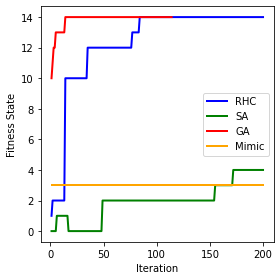

In [11]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot('x', 'Random_Hill', data=df, marker='', c='Blue', markeredgecolor='w', linewidth=2, label='RHC')
ax.plot('x', 'Sim_Anneal', data=df, marker='', c='Green', markeredgecolor='w', linewidth=2, label='SA')
ax.plot('x', 'Genetic_Alg', data=df, marker='', c='Red', markeredgecolor='w', linewidth=2, label='GA')
ax.plot('x', 'MIMIC', data=df, marker='', c='Orange', markeredgecolor='w', linewidth=2, label='Mimic')
ax.set_xlabel('Iteration')
ax.set_ylabel('Fitness State')
ax.legend()

fig.tight_layout()

In [ ]:
mlrose.GridSearchMixin